In [2]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from numpy import linalg


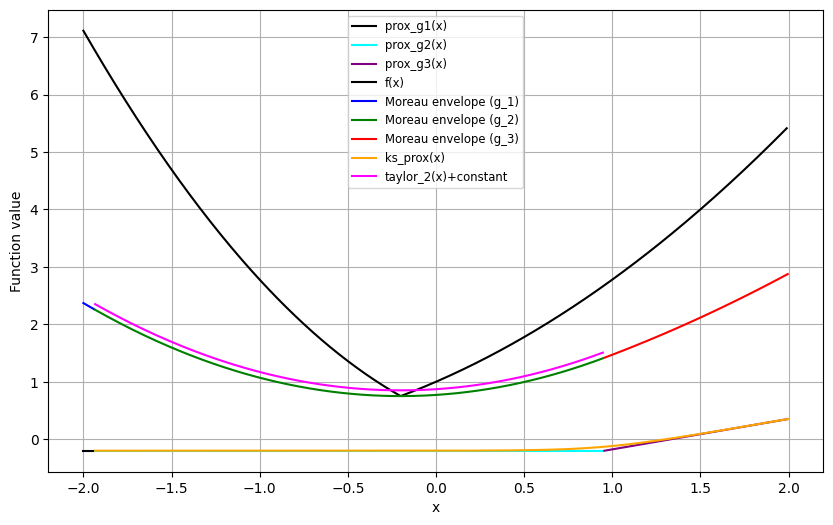

In [4]:

# Define the functions
def f(x):
    return np.maximum((x - 2/3) ** 2, (1 + (2/3) * x) ** 2)

# 3 pieces of the proximal mapping
def g_1(x):
    return (3 * x + 4) / 9

def g_2(x):
    return -0.2 + x - x

def g_3(x):
    return (9 * x - 12) / 17

# Define the Moreau envelope function
def Moreau(x, y):  # y is the proximal mapping
    return f(y) + (1 / 2) * (x - y) ** 2

# Define the ranges for each segment
x = np.arange(-2, 2, 0.01)
x_1 = np.arange(-2, -29 / 15, 0.01)
x_2 = np.arange(-29 /15 , 43/45 , 0.01)
x_3 = np.arange(43/45, 2, 0.01)
x_c = np.arange(-29/15,2, 0.01)

y_1 = Moreau(x_1, g_1(x_1))
y_2 = Moreau(x_2, g_2(x_2))
y_3 = Moreau(x_3, g_3(x_3))

def F(x):
  return Moreau(x,g_2(x))

def grad_F(x):
  return x-g_2(x)

p=10
def ks_prox(x,p):
  return (1/p)* np.log(np.exp(p*-0.2)+ np.exp(p*g_3(x))
)

def diff_ks_prox(x, h, p):
    return (ks_prox(x + h, p) - ks_prox(x - h, p)) / (2 * h)

def hessian(x):
  return 1*(1-diff_ks_prox(x, 00.1, 10))

def taylor_2(x):
  return 0.1+F(-0.2)+grad_F(-0.2)*(x+0.2)+0.5*hessian(-0.2)*(x+0.2)**2

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_1,g_2(x_1),label= 'prox_g1(x)',color='black')

plt.plot(x_2,g_2(x_2),label= 'prox_g2(x)',color='cyan')
plt.plot(x_3,g_3(x_3),label= 'prox_g3(x)',color='purple')
plt.plot(x, f(x), label='f(x)', color='black')
plt.plot(x_1, y_1, label='Moreau envelope (g_1)', color='blue')
plt.plot(x_2, y_2, label='Moreau envelope (g_2)', color='green')
plt.plot(x_3, y_3, label='Moreau envelope (g_3)', color='red')
plt.plot(x_c,ks_prox(x_c,10),label= 'ks_prox(x)',color='orange')
plt.plot(x_2,taylor_2(x_2),label= 'taylor_2(x)+constant',color='fuchsia')
#plt.plot(x_c,grad(x_c),label= 'grad(x)',color='peru')


plt.grid(True)
plt.legend(fontsize='small')
plt.xlabel("x")
plt.ylabel("Function value")
plt.show()
second_derivative = 1 - ks_prox(x, p)  # Replace 'p' with the appropriate value
